<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/1_Intro_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerías necesarias

from keras.datasets import mnist

# Cargar los datos de MNIST 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Verificar la forma de los datos de entrenamiento
train_images.shape

(60000, 28, 28)

In [2]:
# Verificar la forma de los datos de prueba
len(train_labels)

60000

In [4]:
# Verificar los labels de entrenamiento
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# Verificar la forma de los datos de prueba
test_images.shape


(10000, 28, 28)

In [6]:
# Verificar los labels de prueba
len(test_labels)

10000

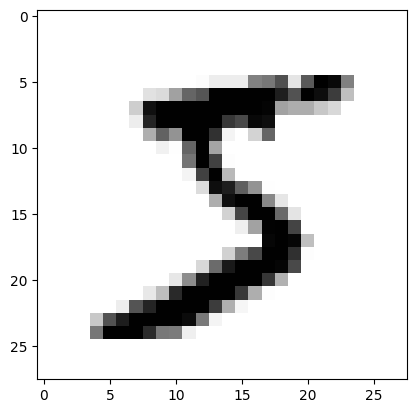

In [9]:
import matplotlib.pyplot as plt


# Verificar los labels de prueba
test_labels

# visualizar los datos de entrenamiento
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()



In [10]:
# Definir la arquitectura de la red neuronal
from keras import models
# Definir las capas de la red neuronal
from keras import layers        
# Crear la red neuronal
network = models.Sequential()
# Agregar la primera capa oculta
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# Agregar la capa de salida
network.add(layers.Dense(10, activation='softmax'))

c:\Users\Jose Armando Ordoñez\Documents\code\deeplearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compilar la red neuronal
# los parametros se explican en el siguiente link: https://keras.io/api/layers/core_layers/dense/

network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])




In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
print(test_labels.shape)

(10000,)


In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(test_labels.shape)

(10000, 10)


In [15]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8756 - loss: 0.4344
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9653 - loss: 0.1168
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9788 - loss: 0.0723
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0519
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0358


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0819
test_acc: 0.9776999950408936
